##Data Loading

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('/content/drive/MyDrive/IntroToDataScience-SamanthaMathieu/Project 3/data/cleaned_data.csv')

Mounted at /content/drive


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from numpy.matrixlib.defmatrix import N
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
df.head()

,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,AST,ALT,ggt,dental caries,tartar,smoking,bmi,upcratio,LDLratio,HDLratio
0,0,0,40,155,60,81.3,1.2,1.0,1,1,...,18,19,27,0,1,0,0.002497,1.428571,0.586047,0.339535
1,1,0,40,160,60,81.0,0.8,0.6,1,1,...,22,19,18,0,1,0,0.002344,1.666667,0.661458,0.218750
2,2,1,55,170,60,80.0,0.8,0.8,1,1,...,21,16,22,0,0,1,0.002076,1.000000,0.623967,0.227273
3,3,1,40,165,70,88.0,1.5,1.5,1,1,...,19,26,18,0,1,0,0.002571,1.000000,0.701863,0.139752
4,4,0,40,155,60,86.0,1.0,1.0,1,1,...,16,14,22,0,0,0,0.002497,1.666667,0.581522,0.336957


In [4]:
df.columns

Index(['ID', 'gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting blood sugar', 'cholesterol',
       'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'urine protein',
       'serum creatinine', 'AST', 'ALT', 'ggt', 'dental caries', 'tartar',
       'smoking', 'bmi', 'upcratio', 'LDLratio', 'HDLratio'],
      dtype='object')

##Age Interaction

In [5]:
under_30_df = df[df['age'] < 30]
over_60_df = df[df['age'] > 60]
_30_60_df = df[(df['age'] >= 30) & (df['age'] <= 60)]

under_30_smokers_df = under_30_df[under_30_df['smoking'] == 1]
under_30_nonsmokers_df = under_30_df[under_30_df['smoking'] == 0]

over_60_smokers_df = over_60_df[over_60_df['smoking'] == 1]
over_60_nonsmokers_df = over_60_df[over_60_df['smoking'] == 0]

_30_60_df_smokers_df = _30_60_df[_30_60_df['smoking'] == 1]
_30_60_df_nonsmokers_df = _30_60_df[_30_60_df['smoking'] == 0]

###Under 30, UPCratio

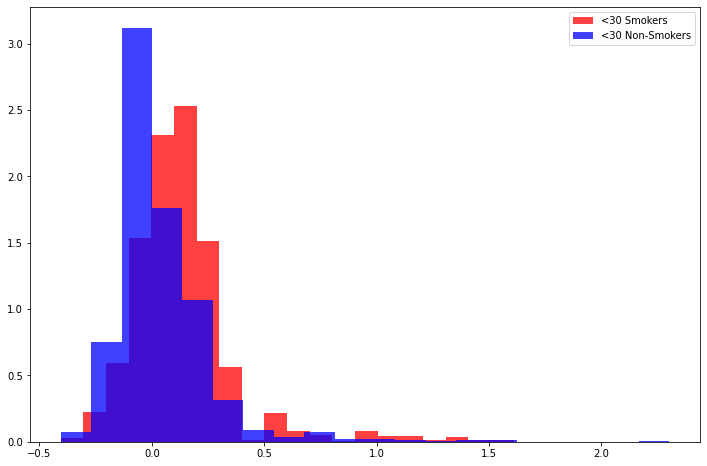

In [6]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(under_30_smokers_df['upcratio']), color='red', alpha=0.75, label='<30 Smokers', density=True, bins=20)
plt.hist(np.log(under_30_nonsmokers_df['upcratio']), color='blue', alpha=0.75, label='<30 Non-Smokers', density=True, bins=20)
plt.legend();

###Over 60, UPCratio

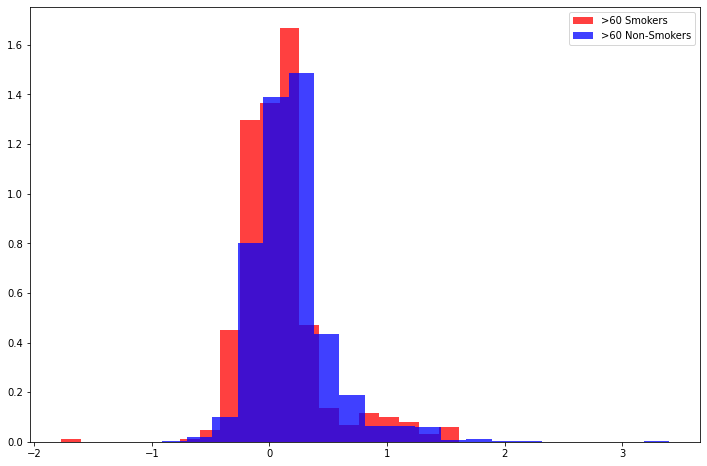

In [7]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(over_60_smokers_df['upcratio']), color='red', alpha=0.75, label='>60 Smokers', density=True, bins=20)
plt.hist(np.log(over_60_nonsmokers_df['upcratio']), color='blue', alpha=0.75, label='>60 Non-Smokers', density=True, bins=20)
plt.legend();

###Between 30-60, UPCratio

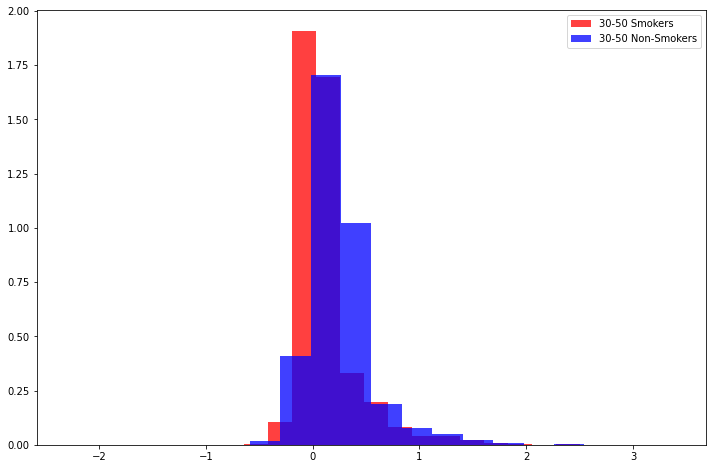

In [8]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(_30_60_df_smokers_df['upcratio']), color='red', alpha=0.75, label='30-50 Smokers', density=True, bins=20)
plt.hist(np.log(_30_60_df_nonsmokers_df['upcratio']), color='blue', alpha=0.75, label='30-50 Non-Smokers', density=True, bins=20)
plt.legend();

###Hemoglobin

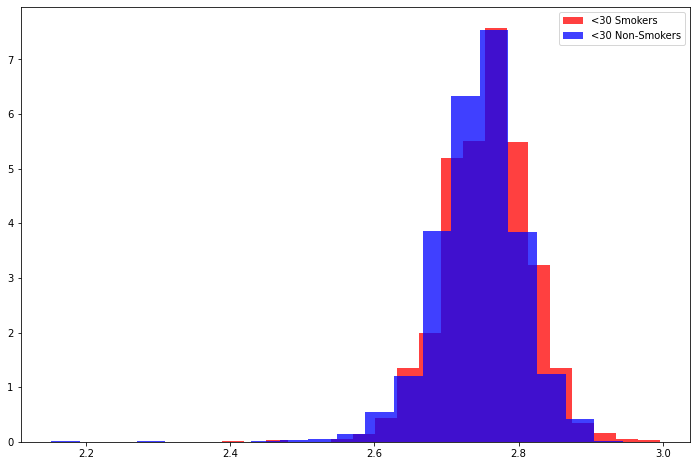

In [9]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(under_30_smokers_df['hemoglobin']), color='red', alpha=0.75, label='<30 Smokers', density=True, bins=20)
plt.hist(np.log(under_30_nonsmokers_df['hemoglobin']), color='blue', alpha=0.75, label='<30 Non-Smokers', density=True, bins=20)
plt.legend();

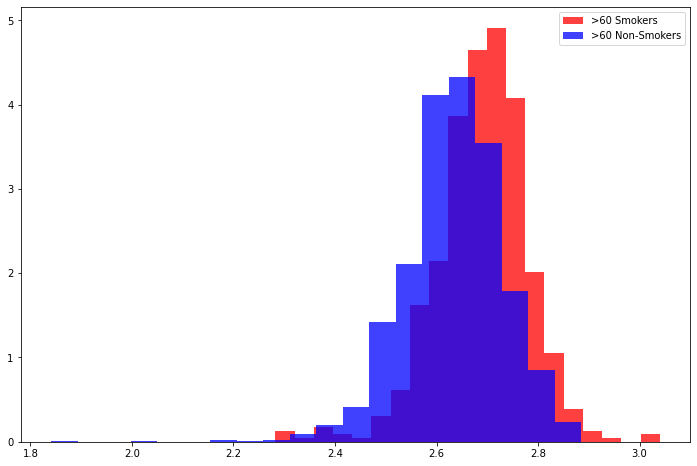

In [10]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(over_60_smokers_df['hemoglobin']), color='red', alpha=0.75, label='>60 Smokers', density=True, bins=20)
plt.hist(np.log(over_60_nonsmokers_df['hemoglobin']), color='blue', alpha=0.75, label='>60 Non-Smokers', density=True, bins=20)
plt.legend();

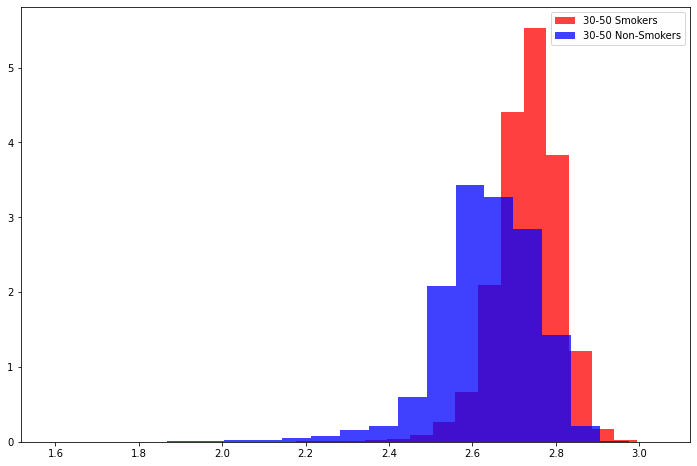

In [11]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(_30_60_df_smokers_df['hemoglobin']), color='red', alpha=0.75, label='30-50 Smokers', density=True, bins=20)
plt.hist(np.log(_30_60_df_nonsmokers_df['hemoglobin']), color='blue', alpha=0.75, label='30-50 Non-Smokers', density=True, bins=20)
plt.legend();

###Dental Caries

In [ ]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(under_30_smokers_df['tartar']), color='red', alpha=0.75, label='<30 Smokers', density=True, bins=20)
plt.hist(np.log(under_30_nonsmokers_df['tartar']), color='blue', alpha=0.75, label='<30 Non-Smokers', density=True, bins=20)
plt.legend();

In [ ]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(over_60_smokers_df['dental caries']), color='red', alpha=0.75, label='>60 Smokers', density=True, bins=20)
plt.hist(np.log(over_60_nonsmokers_df['dental caries']), color='blue', alpha=0.75, label='>60 Non-Smokers', density=True, bins=20)
plt.legend();

In [ ]:
plt.figure(figsize=(12, 8))

plt.hist(np.log(_30_60_df_smokers_df['dental caries']), color='red', alpha=0.75, label='30-50 Smokers', density=True, bins=20)
plt.hist(np.log(_30_60_df_nonsmokers_df['dental caries']), color='blue', alpha=0.75, label='30-50 Non-Smokers', density=True, bins=20)
plt.legend();

#Modeling

In [14]:
X = df.drop(columns=df[['smoking','ID']])
y = df['smoking']

In [15]:
X.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,serum creatinine,AST,ALT,ggt,dental caries,tartar,bmi,upcratio,LDLratio,HDLratio
0,0,40,155,60,81.3,1.2,1.0,1,1,114,...,0.7,18,19,27,0,1,0.002497,1.428571,0.586047,0.339535
1,0,40,160,60,81.0,0.8,0.6,1,1,119,...,0.6,22,19,18,0,1,0.002344,1.666667,0.661458,0.218750
2,1,55,170,60,80.0,0.8,0.8,1,1,138,...,1.0,21,16,22,0,0,0.002076,1.000000,0.623967,0.227273
3,1,40,165,70,88.0,1.5,1.5,1,1,100,...,1.0,19,26,18,0,1,0.002571,1.000000,0.701863,0.139752
4,0,40,155,60,86.0,1.0,1.0,1,1,120,...,0.6,16,14,22,0,0,0.002497,1.666667,0.581522,0.336957


In [16]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: smoking, dtype: int64

###Logistic Model (no split)

In [17]:
logr = LogisticRegression()

logr.fit(X, y)

logr_preds = logr.predict(X)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
r2s = r2_score
r2s(y,logr_preds)

-0.2272327605132347

In [20]:
mse = mean_squared_error(logr_preds,y)
mse

0.2851935646053293

In [21]:
print(classification_report(y, logr_preds))

              precision    recall  f1-score   support

           0       0.75      0.82      0.78     35237
           1       0.63      0.53      0.58     20455

    accuracy                           0.71     55692
   macro avg       0.69      0.68      0.68     55692
weighted avg       0.71      0.71      0.71     55692



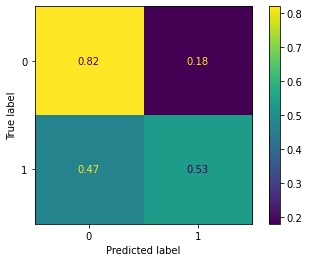

In [22]:
ConfusionMatrixDisplay.from_predictions(y, logr.predict(X), normalize='true')
plt.show()

In [23]:
logr.coef_

array([[ 3.16042148e-01, -8.97535317e-03, -1.42008544e-02,
         4.73074627e-02, -6.64078111e-02, -7.30444264e-03,
        -7.42340521e-03, -1.62670177e-02, -1.39199584e-02,
        -5.91965791e-03, -1.14599389e-02,  3.47836409e-03,
        -6.20057224e-03,  4.22229877e-03, -1.40827980e-02,
         3.02731665e-04,  4.63603497e-01, -1.82120354e-02,
         3.52051939e-02, -2.30496182e-03, -7.78633588e-03,
         1.30360677e-02,  6.56221121e-02,  7.63919363e-02,
        -8.28100499e-05, -1.15250777e-01, -1.21730249e-02,
        -4.82497237e-03]])

##Traintestsplit and balance

In [24]:
#make separate dfs with only smokers and only nonsmokers
df_smokers = df[df['smoking'] == 1]
df_nonsmokers = df[df['smoking'] == 0]
X_smokers = df_smokers.drop(['smoking', 'ID'], axis=1)
y_smokers = df_smokers['smoking']
X_nonsmokers = df_nonsmokers.drop(['smoking', 'ID'], axis=1)
y_nonsmokers = df_nonsmokers['smoking']
#split these dfs 70/30, then combine to get 50-50 balanced training and testing sets
X_train_smokers, X_test_smokers, y_train_smokers, y_test_smokers = train_test_split(X_smokers, y_smokers, train_size = 0.7)
num_rows_to_use = len(X_train_smokers)
X_train_nonsmokers, X_test_nonsmokers, y_train_nonsmokers, y_test_nonsmokers = train_test_split(X_nonsmokers,
                                                                                    y_nonsmokers, train_size = num_rows_to_use)
X_train = pd.concat([X_train_smokers, X_train_nonsmokers])
y_train = pd.concat([y_train_smokers, y_train_nonsmokers])
X_test = pd.concat([X_test_smokers, X_test_nonsmokers])
y_test = pd.concat([y_test_smokers, y_test_nonsmokers])

###Logistic Model

In [35]:
logr = LogisticRegression()

logr.fit(X_train, y_train)

logr_preds2 = logr.predict(X_test)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


-0.7226663896139569
0.3021141336487286
              precision    recall  f1-score   support

           0       0.91      0.68      0.78     20919
           1       0.41      0.76      0.53      6137

    accuracy                           0.70     27056
   macro avg       0.66      0.72      0.65     27056
weighted avg       0.79      0.70      0.72     27056



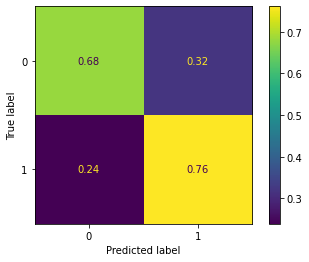

In [36]:
r2s = r2_score
print(r2s(y_test,logr_preds2))

mse = mean_squared_error(logr_preds2,y_test)
print(mse)

print(classification_report(y_test, logr_preds2))

ConfusionMatrixDisplay.from_predictions(y_test, logr_preds2, normalize='true')
plt.show()

In [37]:
logr.coef_

array([[ 3.12042658e-01, -3.71447614e-03, -4.82617078e-04,
         4.24467244e-02, -5.94373138e-02, -1.30349261e-02,
        -7.26087417e-03, -1.41560077e-02, -1.27701726e-02,
        -2.86038539e-02,  1.48296114e-02,  8.47329945e-04,
        -1.16395708e-02,  4.62403234e-03, -1.24418576e-02,
         2.92041466e-03,  4.28573571e-01, -1.50018421e-02,
         3.80625242e-02, -1.02297870e-02, -4.21109760e-03,
         1.49262253e-02,  5.87768847e-02,  7.37953914e-02,
        -8.08952941e-05, -1.11517051e-01, -1.18690572e-02,
        -4.92351765e-03]])

###Nearest Neighbors

In [28]:
knn_params = {'n_neighbors': [30, 50, 70, 80, 100]}

knn = KNeighborsClassifier()

knn_gs = GridSearchCV(knn, knn_params)

knn_gs.fit(X_train, y_train)

knn_gs_preds = knn_gs.predict(X_test)

In [29]:
knn_gs.best_params_

{'n_neighbors': 30}

In [30]:
best_model_knn = knn_gs.best_estimator_

In [31]:
preds_knnmodel = best_model_knn.predict(X_test)
acc = accuracy_score(y_test, preds_knnmodel)

print(acc)

0.6805884092253105


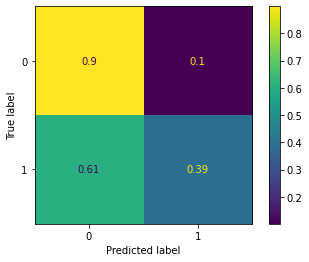

In [32]:
ConfusionMatrixDisplay.from_predictions(knn_gs_preds, y_test, normalize='true')

In [34]:
print(classification_report(y_test, knn_gs_preds))

              precision    recall  f1-score   support

           0       0.90      0.66      0.76     20919
           1       0.39      0.75      0.52      6137

    accuracy                           0.68     27056
   macro avg       0.65      0.70      0.64     27056
weighted avg       0.78      0.68      0.71     27056



##Only Coeffs with cutoff

###Logistic

In [38]:
#make separate dfs with only smokers and only nonsmokers
df_smokers = df[df['smoking'] == 1]
df_nonsmokers = df[df['smoking'] == 0]
X_smokers = df_smokers[['hemoglobin', 'gender', 'upcratio', 'tartar', 'dental caries']]
y_smokers = df_smokers['smoking']
X_nonsmokers = df_nonsmokers[['hemoglobin', 'gender', 'upcratio', 'tartar', 'dental caries']]
y_nonsmokers = df_nonsmokers['smoking']
#split these dfs 70/30, then combine to get 50-50 balanced training and testing sets
X_train_smokers, X_test_smokers, y_train_smokers, y_test_smokers = train_test_split(X_smokers, y_smokers, train_size = 0.7)
num_rows_to_use = len(X_train_smokers)
X_train_nonsmokers, X_test_nonsmokers, y_train_nonsmokers, y_test_nonsmokers = train_test_split(X_nonsmokers,
                                                                                    y_nonsmokers, train_size = num_rows_to_use)
X_train = pd.concat([X_train_smokers, X_train_nonsmokers])
y_train = pd.concat([y_train_smokers, y_train_nonsmokers])
X_test = pd.concat([X_test_smokers, X_test_nonsmokers])
y_test = pd.concat([y_test_smokers, y_test_nonsmokers])

In [39]:
logr = LogisticRegression()

logr.fit(X_train, y_train)

logr_preds2 = logr.predict(X_test)

-1.016451188625684
0.3536369012418687
              precision    recall  f1-score   support

           0       0.98      0.55      0.71     20919
           1       0.39      0.96      0.55      6137

    accuracy                           0.65     27056
   macro avg       0.68      0.76      0.63     27056
weighted avg       0.84      0.65      0.67     27056



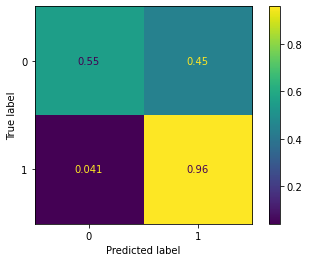

In [40]:
r2s = r2_score
print(r2s(y_test,logr_preds2))

mse = mean_squared_error(logr_preds2,y_test)
print(mse)

print(classification_report(y_test, logr_preds2))

ConfusionMatrixDisplay.from_predictions(y_test, logr_preds2, normalize='true')
plt.show()

###Nearest Neighbors

In [41]:
knn_params = {'n_neighbors': [30, 50, 70, 80, 100]}

knn = KNeighborsClassifier()

knn_gs = GridSearchCV(knn, knn_params)

knn_gs.fit(X_train, y_train)

knn_gs_preds = knn_gs.predict(X_test)

In [42]:
knn_gs.best_params_

{'n_neighbors': 70}

In [43]:
best_model_knn = knn_gs.best_estimator_

In [44]:
preds_knnmodel = best_model_knn.predict(X_test)
acc = accuracy_score(y_test, preds_knnmodel)

print(acc)

0.6528311649911295


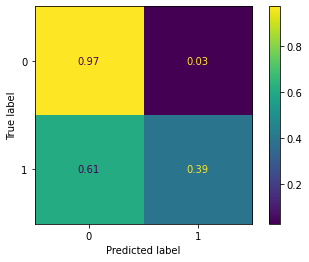

In [45]:
ConfusionMatrixDisplay.from_predictions(knn_gs_preds, y_test, normalize='true')